In [2]:
import json
import pandas as pd
import random
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


C:\Users\aishs\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
with open('../losses.json') as json_file:
    loss_data = json.load(json_file)
    losses = pd.DataFrame(loss_data)

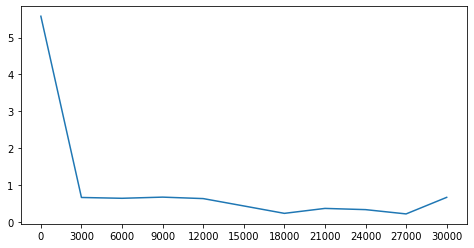

In [3]:
plt.figure(figsize=(8,4))
plt.plot(losses['iteration'], [float(loss) for loss in losses['loss']])

In [4]:
with open('../data/annotations/val_questions.json') as json_file:
    questions_data = json.load(json_file)
    questions = pd.DataFrame(questions_data['questions'])
with open('../data/annotations/val_annotations.json') as json_file:
    annotations_data = json.load(json_file)
    annotations = pd.DataFrame(annotations_data['annotations'])

In [5]:
def view_random_question(indexes):
    record = annotations.loc[random.choice(indexes)]
#     fig = plt.figure(figsize=(15, 15))
#     columns = 5
#     rows = 1
#     for i, image in enumerate(record['image_id']):
#         img = image[8:].replace('/', '-')
#         image_path = "../data/val/"+img
#         img = mpimg.imread(image_path)
#         fig.add_subplot(rows, columns, i+1)
#         plt.axis('off')
#         plt.imshow(img)
#     plt.show()
#     print("Description: {}".format(record['description']))
    print("Question: {}".format(record['question']))
    print("Actual answer: {}".format(record['multiple_choice_answer']))
    print("Generated answer: {}".format(record['generated_answer']))

In [6]:
def get_accuracy():
    count = 0
    numbers = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven']
    for i, record in annotations.iterrows():
        ans = record['multiple_choice_answer']
        if ans in numbers:
            ans = str(numbers.index(ans))
        gen_ans = record['generated_answer']
        if gen_ans in numbers:
            gen_ans = str(numbers.index(gen_ans))
        if gen_ans in ans:
            count += 1
    return (float(count)/float(len(annotations)))

In [14]:
def view_results(results_file):
    with open(results_file) as json_file:
        results_data = json.load(json_file)
        results = pd.DataFrame(results_data)
    
    annotations['description'] = pd.Series(questions['description'])
    annotations['question'] = pd.Series(questions['question'])
    annotations['generated_answer'] = pd.Series(results['answer'])
    
    print("Correct answer example: ")
    indexes = []
    for i, record in annotations.iterrows():
        if record['generated_answer'] in record['multiple_choice_answer']:
            indexes.append(i)
    view_random_question(indexes)
    
    print("")
    print("Random example: ")
    indexes = range(len(annotations))
    view_random_question(indexes)
    
    mrr_scores = pd.Series(results['mrr_score'])
    
    return get_accuracy(), mrr_scores.mean()

In [15]:
accuracies = []
mrr_scores = []
for i in range(3000, 31000, 3000):
    print("Iteration: {}".format(i))
    accuracy, mrr = view_results('val_results{}.json'.format(i))
    accuracies.append(accuracy)
    mrr_scores.append(mrr)
    print("")

Iteration: 3000
Correct answer example: 
Question: how many ladies are giving pose for the picture?
Actual answer: 2
Generated answer: 2

Random example: 
Question: when they went to the city what did they spend time admiring?
Actual answer: buildings and the architecture
Generated answer: sand

Iteration: 6000
Correct answer example: 
Question: what was the event in the story?
Actual answer: birthday party
Generated answer: birthday party

Random example: 
Question: how many cars are moving in a line?
Actual answer: 3
Generated answer: 2

Iteration: 9000
Correct answer example: 
Question: what is the color of the car?
Actual answer: white
Generated answer: white

Random example: 
Question: what is the building covered with?
Actual answer: trees
Generated answer: black

Iteration: 12000
Correct answer example: 
Question: how many ladies are giving pose for the picture?
Actual answer: 2
Generated answer: 2

Random example: 
Question: what day is related from the images?
Actual answer: g

In [16]:
accuracies

[0.037037037037037035,
 0.07407407407407407,
 0.07407407407407407,
 0.08641975308641975,
 0.08641975308641975,
 0.06172839506172839,
 0.06172839506172839,
 0.04938271604938271,
 0.07407407407407407,
 0.037037037037037035]

In [17]:
# ques
mrr_scores

[0.11405079715016372,
 0.15174120421458503,
 0.13094578131889925,
 0.1428762699322132,
 0.1437132300886145,
 0.12772502991478105,
 0.1418606780765841,
 0.12708986047108367,
 0.13411025046718134,
 0.11405079715016372]

In [5]:
accuracies = []
for i in range(3000, 31000, 3000):
    with open('data'+str(i)+'.json') as json_file:
        data = json.load(json_file)
        data = pd.DataFrame(data)
    true_positives = len(data[data['predicted_answer']==data['true_answer']])
    accuracy = true_positives / len(data)
    accuracies.append(accuracy)
accuracies

[0.30864197530864196,
 0.37037037037037035,
 0.3333333333333333,
 0.345679012345679,
 0.345679012345679,
 0.345679012345679,
 0.345679012345679,
 0.37037037037037035,
 0.345679012345679,
 0.30864197530864196]

In [6]:
data

,multiple_choices,predicted_answer,question_id,true_answer
0,"[butterflies, in the lawn, doing fireworks, wh...",in the lawn,0,white
1,"[protest, iced tea beer desserts, dancing, din...",dinner,1,unk
2,"[bird, unk, parade, beer, green white]",bird,2,unk
3,"[unk, plate, play games, selling, 2]",2,3,unk
4,"[costume party, black, yes, chalk, students ou...",costume party,4,yes
5,"[long sleeve clothes, in the balcony, unk, bla...",in the balcony,5,unk
6,"[five, two, patrick's day parade, inside the c...",five,6,two
7,"[aircraft carriers, robot, a mime, unk, keepin...",keeping fit,7,unk
8,"[vegetables, sunny, unk, river side, white]",river side,9,unk
9,"[glass, unk, yes two, invitation, in the pool]",yes two,10,unk


# 5-way classification

train - 471 and test - 81

In [19]:
accuracies = []
for i in [20, 40, 50, 60, 80, 100, 200, 300, 400, 800, 1200]:
    with open('lstmMCdata'+str(i)+'.json') as json_file:
        data = json.load(json_file)
        data = pd.DataFrame(data)
    true_positives = len(data[data['predicted_answer']==data['true_answer']])
    accuracy = true_positives / len(data)
    accuracies.append(accuracy)
accuracies

[0.7530864197530864,
 0.7901234567901234,
 0.7901234567901234,
 0.7654320987654321,
 0.7407407407407407,
 0.654320987654321,
 0.41975308641975306,
 0.3950617283950617,
 0.41975308641975306,
 0.4691358024691358,
 0.48148148148148145]

train - 8100 and test - 2154

In [6]:
accuracies = []
for i in [20, 40, 50, 60, 80, 100, 200, 300, 400, 800, 1200]:
    with open('result_data_'+str(i)+'.json') as json_file:
        data = json.load(json_file)
        data = pd.DataFrame(data)
    true_positives = len(data[data['predicted_answer']==data['true_answer']])
    accuracy = true_positives / len(data)
    accuracies.append(accuracy)
accuracies

[0.7753017641597029,
 0.8324048282265553,
 0.8444753946146704,
 0.8635097493036211,
 0.8788300835654597,
 0.8890436397400185,
 0.8166202414113277,
 0.7284122562674095,
 0.6494893221912721,
 0.6100278551532033,
 0.5984215413184772]

In [24]:
data

,multiple_choices,predicted_answer,question_id,true_answer
0,"[birds, yes, animal, hector, professor]",yes,2633,yes
1,"[parade, every tree and objects are under the ...",parade,2634,parade
2,"[one statue, beauty of nature, non child abuse...",unk,2635,unk
3,"[it like a hill station, goats and pigs, the c...",parade,2636,parade
4,"[napkin, 2, parade, lake and waterfall, a come...",2,2637,parade
5,"[1 his wife, unk, sampling beers and dancing, ...",unk,2638,unk
6,"[arts and crafts, the meeting was arranged to ...",book,2639,arts and crafts
7,"[jasmine, birthday party, dec-15, school, they...",birthday party,2640,birthday party
8,"[the candy, 19, birthday party, walkway, mashe...",birthday party,2641,birthday party
9,"[celtic fest, 9, body of water, beach, parents...",beach,2642,beach


### DII
train - 8100 and test - 2154

In [7]:
accuracies = []
for i in [20, 40, 50, 60, 80, 100, 200, 300, 400, 800, 1200]:
    with open('dii_result_data_'+str(i)+'.json') as json_file:
        data = json.load(json_file)
        data = pd.DataFrame(data)
    true_positives = len(data[data['predicted_answer']==data['true_answer']])
    accuracy = true_positives / len(data)
    accuracies.append(accuracy)
accuracies

[0.7943361188486536,
 0.841225626740947,
 0.8570102135561746,
 0.862116991643454,
 0.8667595171773445,
 0.8676880222841226,
 0.8296193129062209,
 0.7098421541318477,
 0.6388115134633241,
 0.5891364902506964,
 0.5761374187558032]